# A Beginner’s Guide to `matplotlib` for Data Visualization and Exploration in Python

[Source](https://www.analyticsvidhya.com/blog/2020/02/beginner-guide-matplotlib-data-visualization-exploration-python/?utm_source=blog&utm_medium=6-data-visualization-python-libraries)

> "Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shells, the Jupyter notebook, web application servers, and four graphical user interface toolkits."

In this notebook, we will discuss following charts using `matplotlib`

- Bar Graph
- Pie Chart
- Box Plot
- Histogram
- Line Chart and Subplots
- Scatter Plot

We will use [data from Food Demand Forecasting project](https://datahack.analyticsvidhya.com/contest/genpact-machine-learning-hackathon-1/#About) from Analytica Vidhya.

In [23]:
# import libraries
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore")

In [2]:
# laod data
df_meal = pd.read_csv('Data/meal_info.csv') 
df_meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [3]:
df_center = pd.read_csv('Data/fulfilment_center_info.csv') 
df_center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [5]:
df_food = pd.read_csv('Data/train.csv') 
df_food.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [6]:
# merge all the three dataframes into a single dataframe
df = pd.merge(df_food, df_center, on='center_id')
df = pd.merge(df, df_meal, on='meal_id')

## 1. Bar Graph 

> Bar graphs are best used when we need to compare the quantity of categorical values within the same category.
> Bar graphs should not be used for continuous values.

In [7]:
# find the most popular food item that customers have bought from the company
table = pd.pivot_table(data=df, index='category',
                       values='num_orders', aggfunc=np.sum)
table

,num_orders
category,
Beverages,40480525
Biryani,631848
Desert,1940754
Extras,3984979
Fish,871959
Other Snacks,4766293
Pasta,1637744
Pizza,7383720
Rice Bowl,20874063


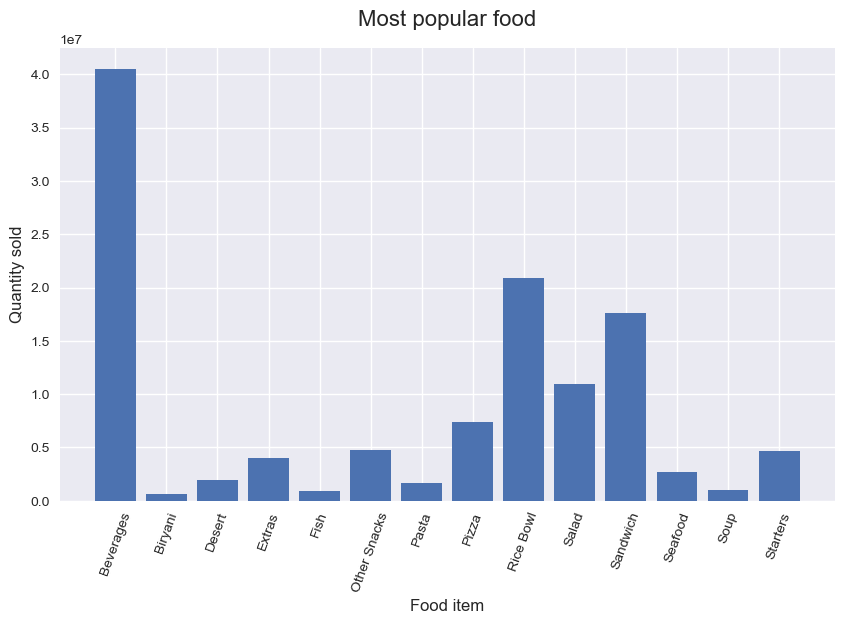

In [14]:
# bar plot
plt.figure(figsize=(10, 6), dpi=100)

plt.bar(table.index, table['num_orders'])

plt.xticks(rotation=70)
plt.xlabel('Food item', fontsize=12)
plt.ylabel('Quantity sold', fontsize=12)
plt.title('Most popular food', fontsize=16, y=1.03)

# uncomment the follwoing code if you want to save the bar plot
# plt.savefig('barchart.png',
#             dpi=300, bbox_inches='tight') 

plt.show()

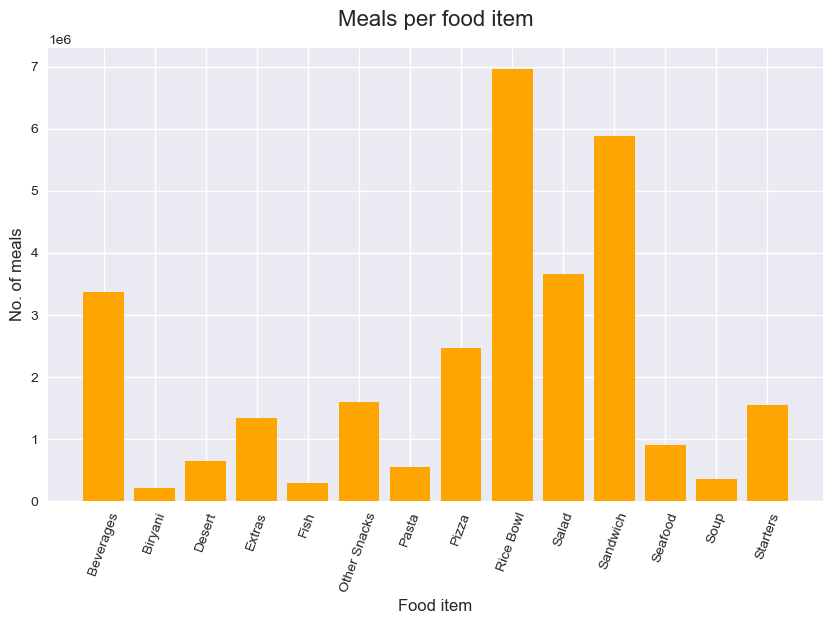

In [16]:
# dictionary for meals per food item
item_count = {}

for i in range(table.index.nunique()):
    item_count[table.index[i]] = table.num_orders[i] / \
        df_meal[df_meal['category'] == table.index[i]].shape[0]

# bar plot
plt.figure(figsize=(10, 6), dpi=100)
plt.bar([x for x in item_count.keys()], [
        x for x in item_count.values()], color='orange')


plt.xticks(rotation=70)
plt.xlabel('Food item', fontsize=12)
plt.ylabel('No. of meals', fontsize=12)
plt.title('Meals per food item', fontsize=16, y=1.03)

plt.show()

## 2. Pie Chart

> A pie chart is suitable to show the proportional distribution of items within the same category.

In [19]:
# dictionary for cuisine and its total orders
d_cuisine = {}

# total number of order
total = df['num_orders'].sum()

# find ratio of orders per cuisine
for i in range(df['cuisine'].nunique()):

    # cuisine
    c = df['cuisine'].unique()[i]

    # num of orders for the cuisine
    c_order = df[df['cuisine'] == c]['num_orders'].sum()
    d_cuisine[c] = c_order/total

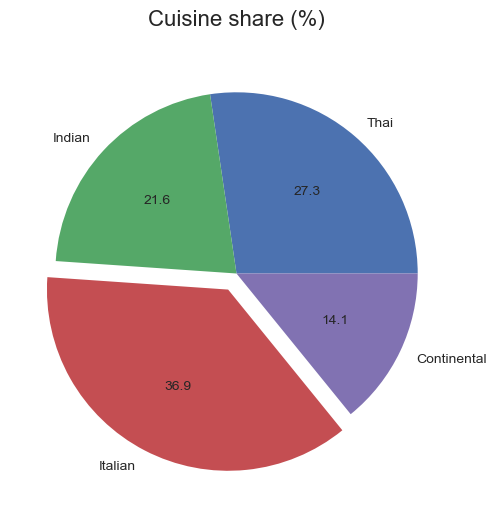

In [20]:
# pie plot
plt.figure(figsize=(10, 6), dpi=100)

plt.pie([x*100 for x in d_cuisine.values()],
        labels=[x for x in d_cuisine.keys()], autopct='%0.1f', explode=[0, 0, 0.1, 0])

# label the plot
plt.title('Cuisine share (%)', fontsize=16, y=1.03)

plt.show()

- `plt.pie()` was used to draw the pie chart and adjust its parameters to make it more appealing
- The `autopct` parameter was used to print the values within the pie chart up to 1 decimal place
- The `explode` parameter was used to offset the Italian wedge to make it stand out from the rest. This makes it instantly clear to the viewer that people love Italian food!

> A pie chart is rendered useless when there are a lot of items within a category. This will decrease the size of each slice and there will be no distinction between the items.

## 3. Boxplot

> Box plot gives statistical information about the distribution of numeric data divided into different groups. It is useful for detecting outliers within each group.

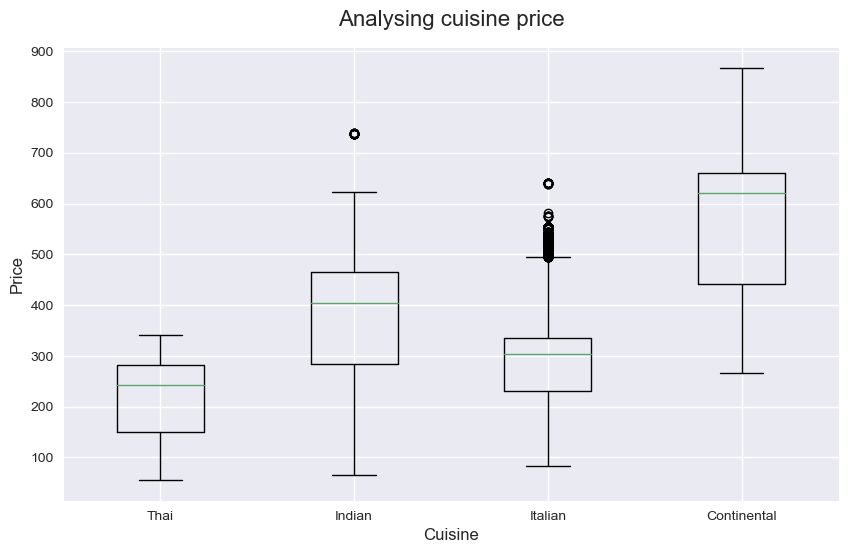

In [24]:
# dictionary for base price per cuisine
c_price = {}
for i in df['cuisine'].unique():
    c_price[i] = df[df['cuisine'] == i].base_price

# boxplot
plt.figure(figsize=(10, 6), dpi=100)
plt.boxplot([x for x in c_price.values()], labels=[x for x in c_price.keys()])

# x and y-axis labels
plt.xlabel('Cuisine', fontsize=12)
plt.ylabel('Price', fontsize=12)

# plot title
plt.title('Analysing cuisine price', fontsize=16, y=1.03)

plt.show()

- The lower, middle and upper part of the box represents the 25th, 50th, and 75th percentile values respectively
- The top whisker represents Q3+1.5*IQR
- The bottom whisker represents Q1-1.5*IQR
- Outliers are shown as scatter points
- It shows skewness in the data

## 4. Histogram

> A histogram shows the distribution of numeric data through a continuous interval by segmenting data into different bins. Useful for inspecting skewness in the data.

- It is easy to confuse histograms with bar plots. But remember, histograms are used with continuous data whereas bar plots are used with categorical data.

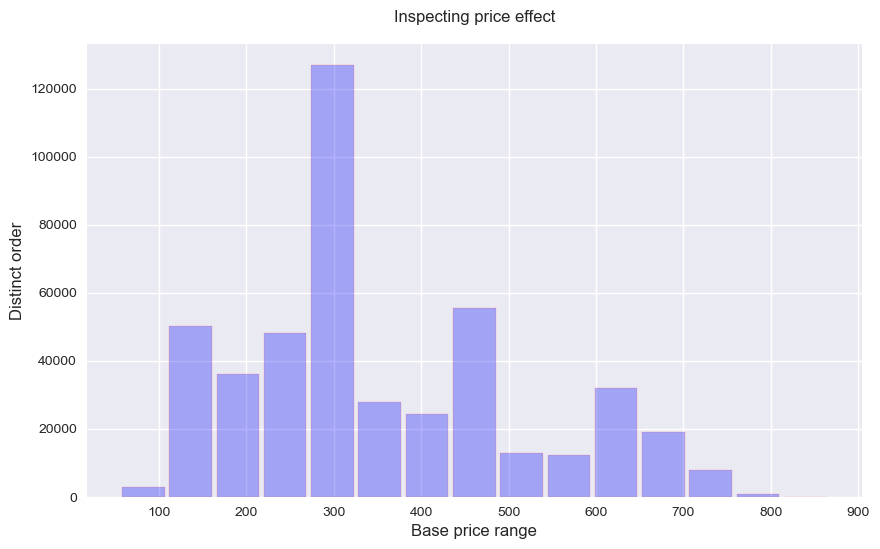

In [25]:
# histogram
plt.figure(figsize=(10, 6), dpi=100)
plt.hist(df['base_price'], rwidth=0.9, alpha=0.3,
         color='blue', bins=15, edgecolor='red')

plt.xlabel('Base price range', fontsize=12)
plt.ylabel('Distinct order', fontsize=12)

plt.title('Inspecting price effect', fontsize=12, y=1.03)

plt.show()

## 5. Line Plot and Subplots

> A line plot is useful for visualizing the trend in a numerical value over a continuous time interval.

- Matplotlib subplots makes it easy to view and compare different plots in the same figure.

In [26]:
# new revenue column
df['revenue'] = df.apply(lambda x: x.checkout_price*x.num_orders, axis=1)

# new month column
df['month'] = df['week'].apply(lambda x: x//4)

# list to store month-wise revenue
month = []
month_order = []

for i in range(max(df['month'])):
    month.append(i)
    month_order.append(df[df['month'] == i].revenue.sum())

# list to store week-wise revenue
week = []
week_order = []

for i in range(max(df['week'])):
    week.append(i)
    week_order.append(df[df['week'] == i].revenue.sum())

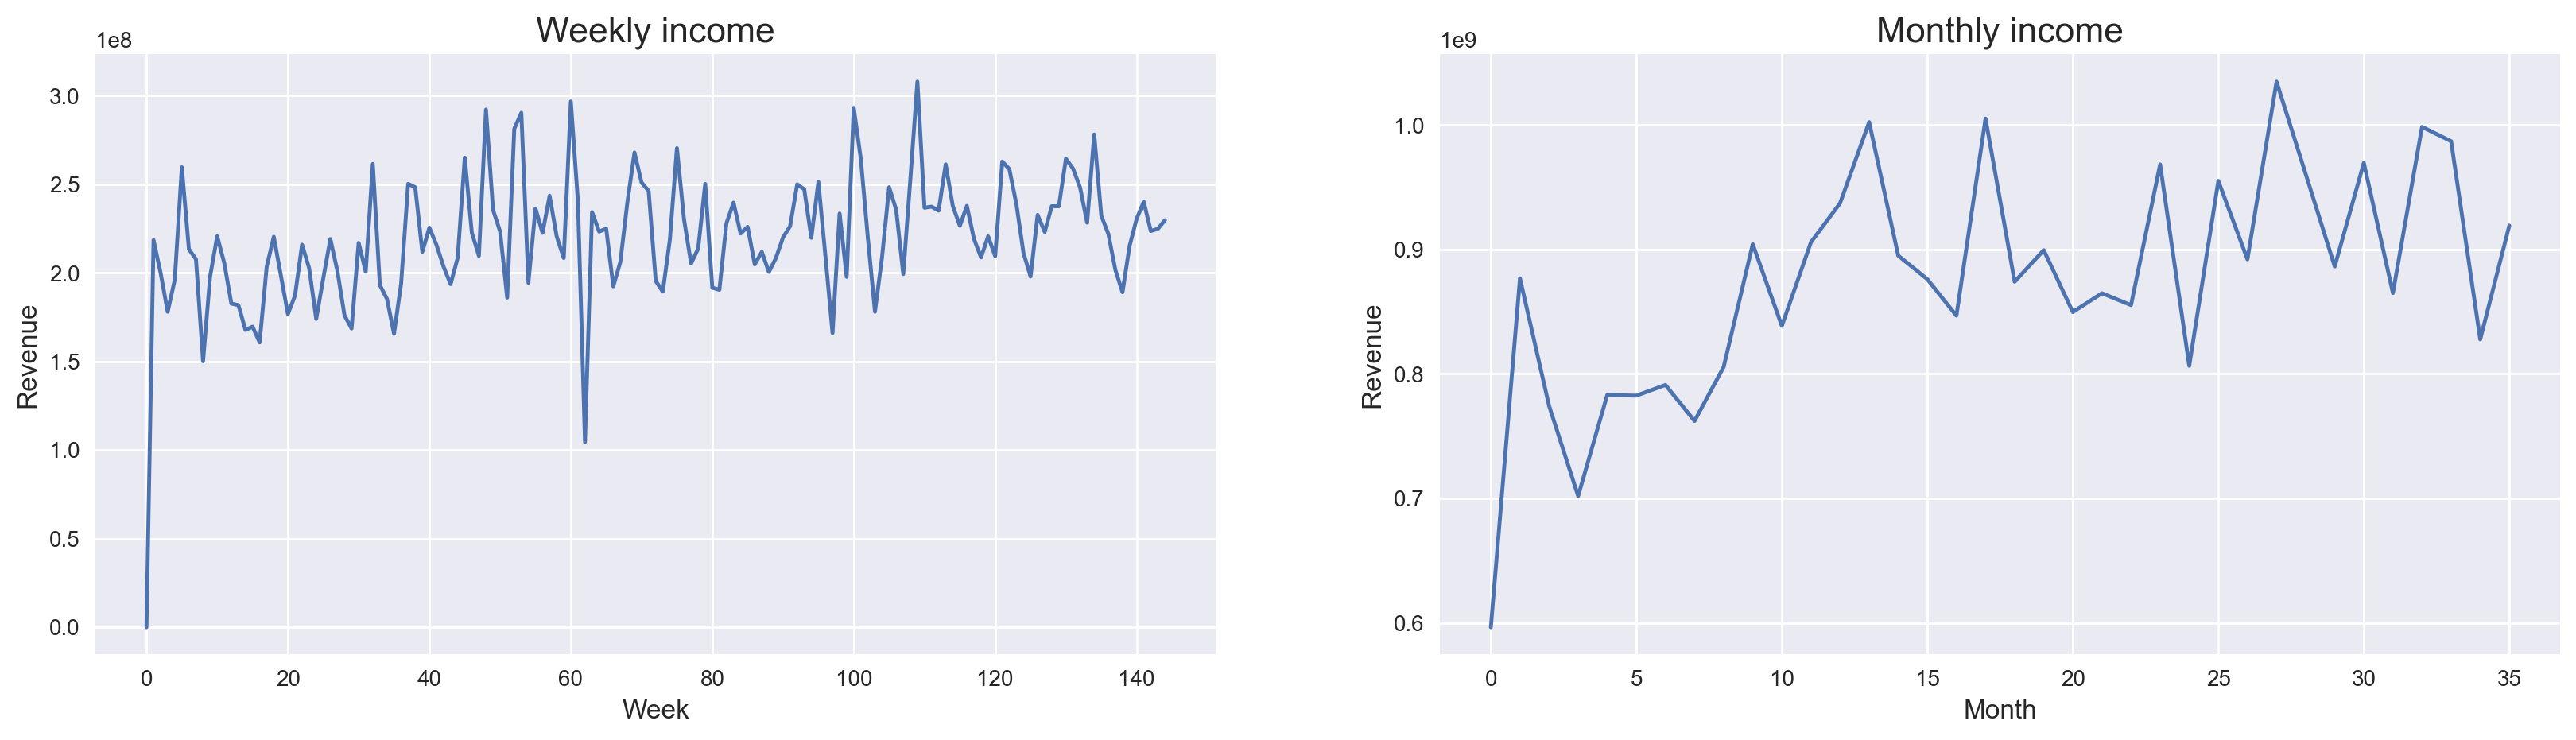

In [32]:
# subplots returns a Figure and an Axes object
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5), dpi=200)

# manipulating the first Axes
ax[0].plot(week, week_order)
ax[0].set_xlabel('Week', fontsize=12)
ax[0].set_ylabel('Revenue', fontsize=12)
ax[0].set_title('Weekly income', fontsize=16)

# manipulating the second Axes
ax[1].plot(month, month_order)
ax[1].set_xlabel('Month', fontsize=12)
ax[1].set_ylabel('Revenue', fontsize=12)
ax[1].set_title('Monthly income', fontsize=16)

plt.show()

## 6. Scatter Plot

> Scatter plots are useful for showing the relationship between two variables. Any correlation between variables or outliers in the data can be easily spotted using scatter plots.

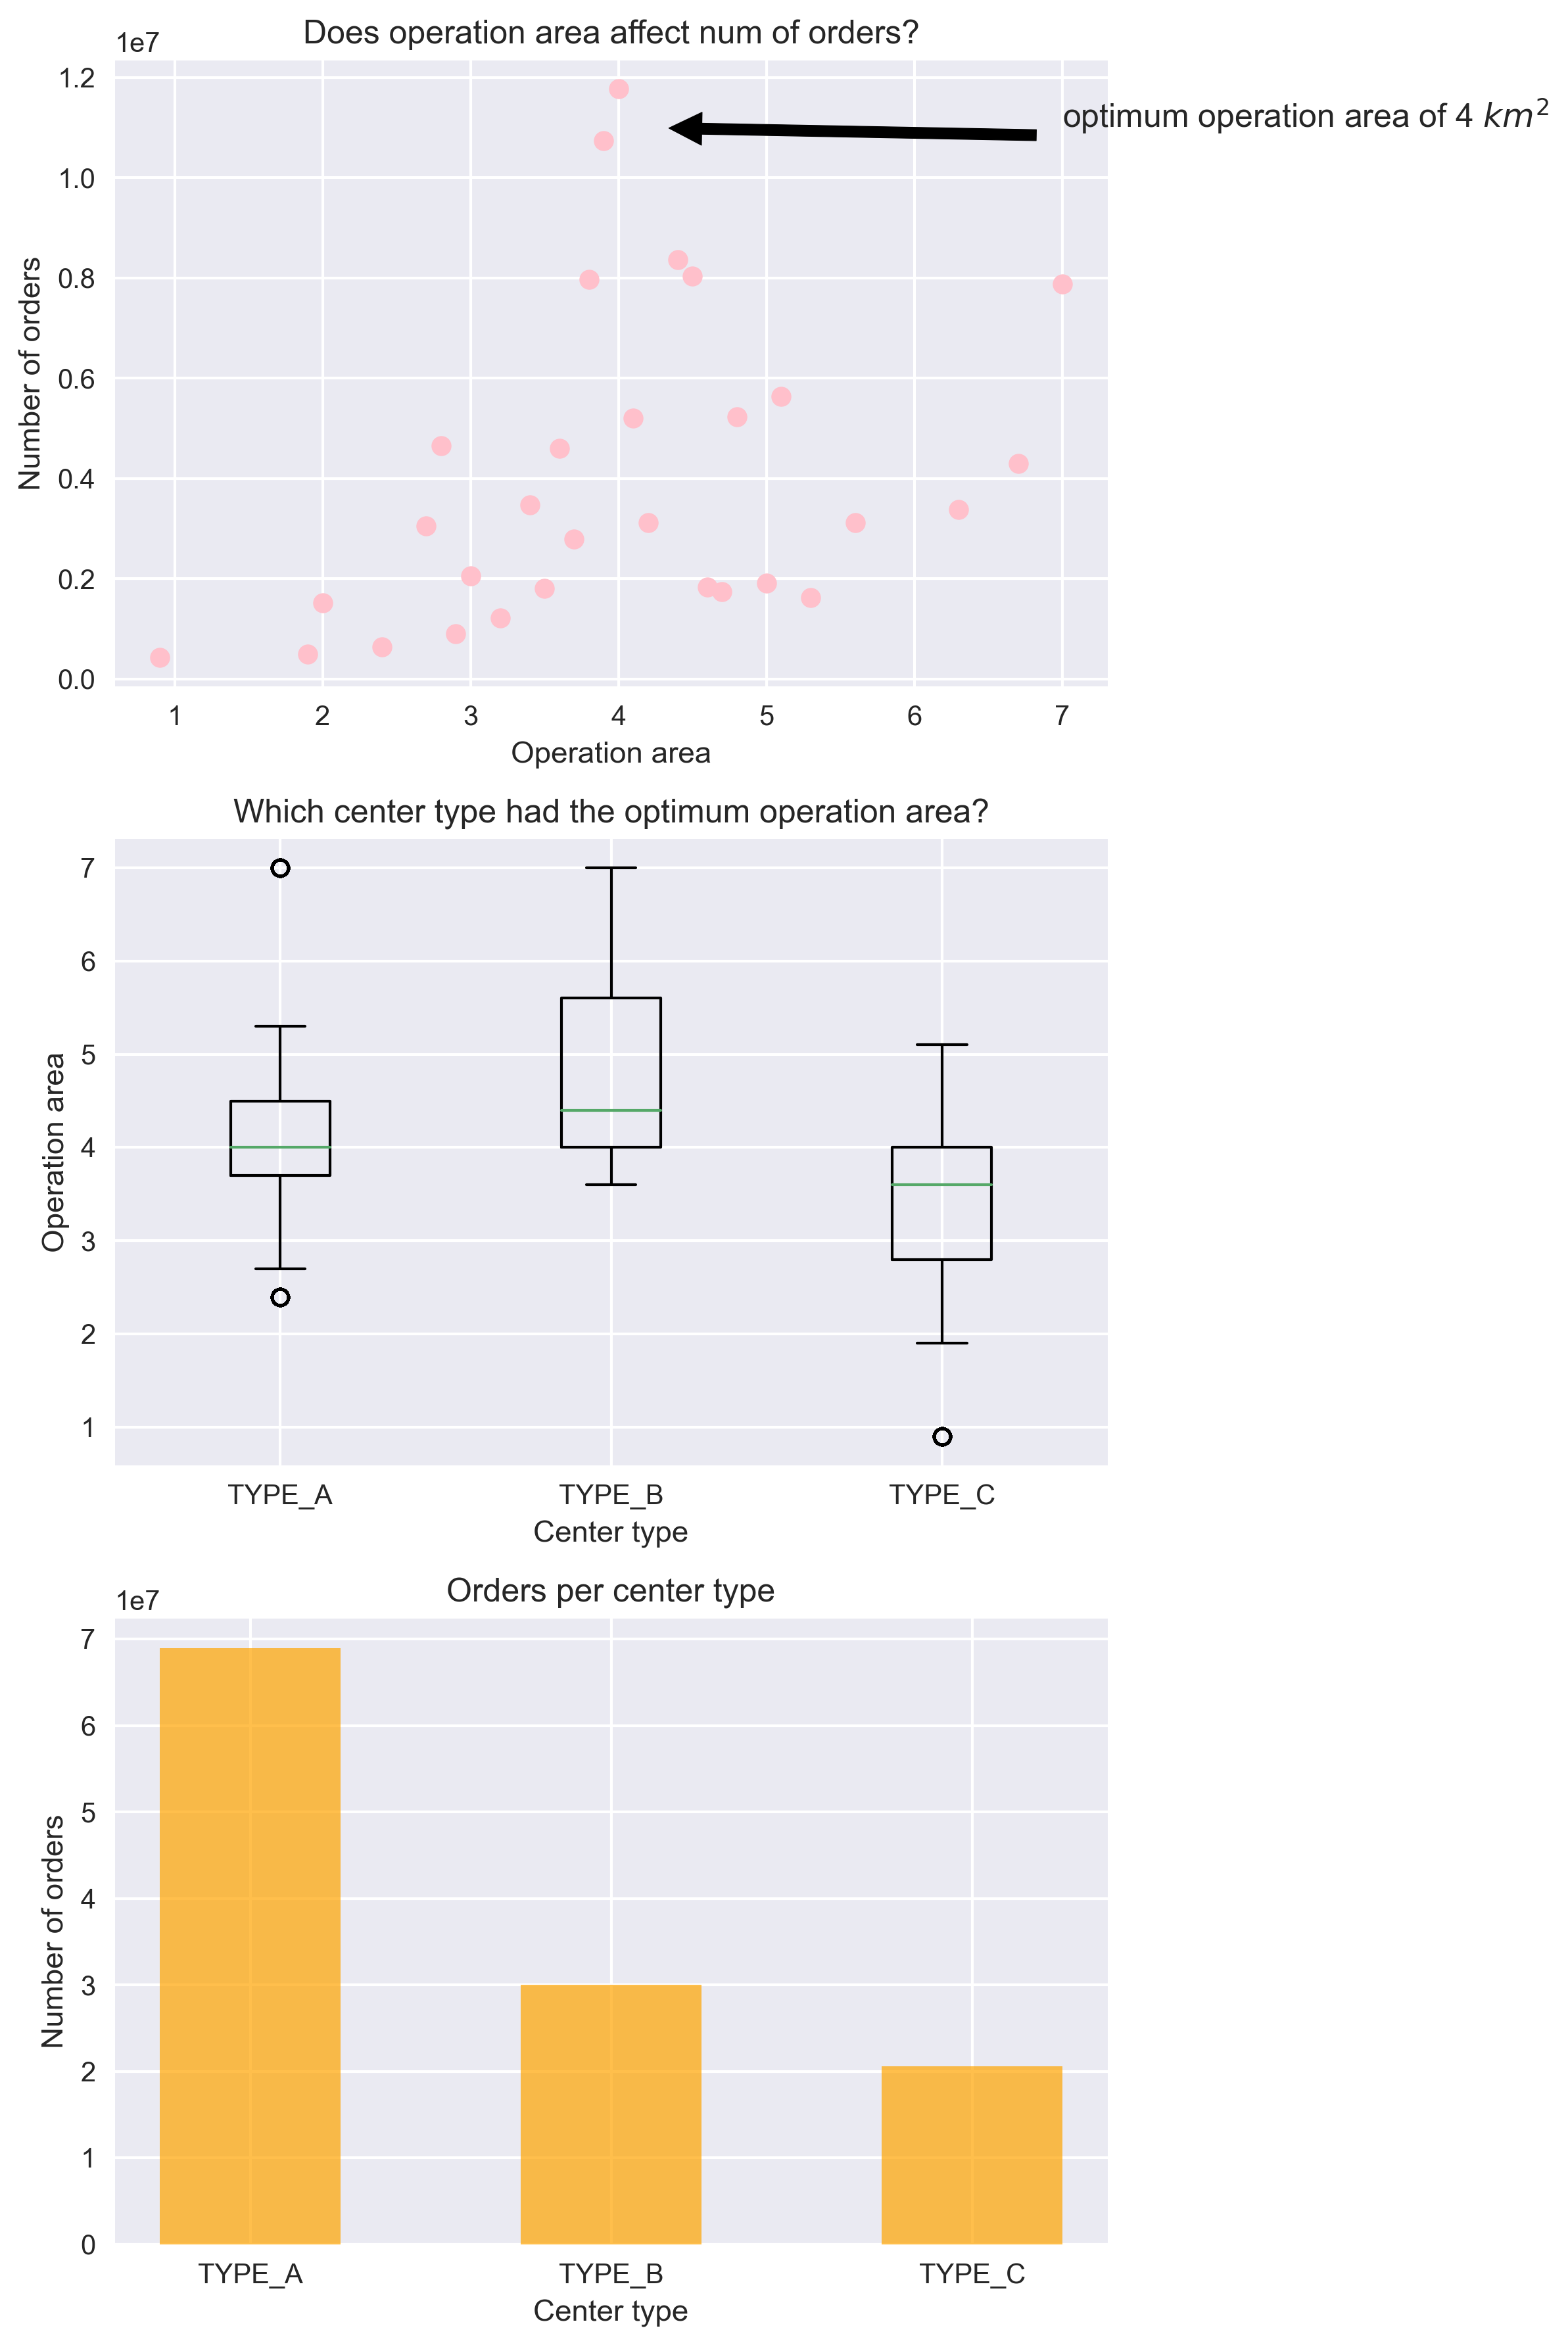

In [38]:
center_type_name = ['TYPE_A', 'TYPE_B', 'TYPE_C']

# relation between op area and number of orders
op_table = pd.pivot_table(
    df, index='op_area', values='num_orders', aggfunc=np.sum)

# relation between center type and op area
c_type = {}
for i in center_type_name:
    c_type[i] = df[df['center_type'] == i].op_area

# relation between center type and num of orders
center_table = pd.pivot_table(
    df, index='center_type', values='num_orders', aggfunc=np.sum)

# subplots
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8, 12), dpi=300)

# scatter plots
ax[0].scatter(op_table.index, op_table['num_orders'], color='pink')
ax[0].set_xlabel('Operation area')
ax[0].set_ylabel('Number of orders')
ax[0].set_title('Does operation area affect num of orders?')
ax[0].annotate('optimum operation area of 4 $km^2$', xy=(4.2, 1.1*10**7), 
               xytext=(7, 1.1*10**7), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)

# boxplot
ax[1].boxplot([x for x in c_type.values()], labels=[x for x in c_type.keys()])
ax[1].set_xlabel('Center type')
ax[1].set_ylabel('Operation area')
ax[1].set_title('Which center type had the optimum operation area?')

# bar graph
ax[2].bar(center_table.index, center_table['num_orders'],
          alpha=0.7, color='orange', width=0.5)
ax[2].set_xlabel('Center type')
ax[2].set_ylabel('Number of orders')
ax[2].set_title('Orders per center type')

# show figure
plt.tight_layout()
plt.show()